<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0731_cat_dog_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# CNN 으로 이용해서 학습과 평가를 진행해보면 될 거 같다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




In [4]:
# data loading
df = pd.read_csv('/content/drive/MyDrive/kcc 3기 colab home/data/cat_dog_full/train.csv')

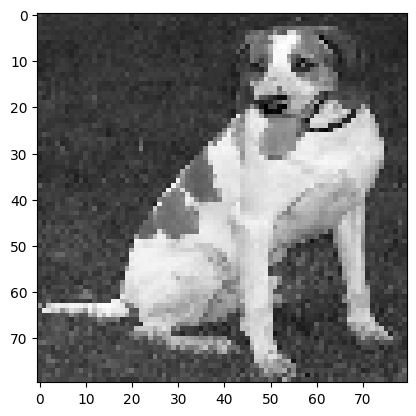

In [5]:
# 이미지 확인부터 해야할 거 같아요.
img_data = df.drop('label', axis=1, inplace=False).values[150:151].reshape(80,80)
plt.imshow(img_data, cmap='gray')
plt.show()


In [6]:

# 데이터 잘 준비 되어있는지 확인 이제 데이터 분리
x_data_test, x_data_train, t_data_train , t_data_train = \
train_test_split(df.drop('label', axis=1, inplace=False).values,
                 df['label'].values.reshape(-1,1),
                 test_size=0.3,
                 random_state=0)

scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)
# 정규화 t 데이터 0과1 이여서 상관없다


In [7]:
# model 구현
model = Sequential()

# feature extranction 부분(convolution, pooling 처리)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1))) #이미지 변환 same, v # szie () 필요 s 생각하고 숫자
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))


# fc layer 입력 넣으면 됨 4차원에 3, 2차원으로
model.add(Flatten()) # 역할 input 역할
# 일반적으로 이쯤에서 dropout 적용
model.add(Dropout(rate=0.5))
# hidden layer도 포함 시킬 수 있다.
model.add(Dense(256,
                 activation='relu'))

# output layer
model.add(Dense(1,activation='sigmoid')) # 2진 분류

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [8]:
# model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model 학습
model_result = model.fit(x_data_train_norm.reshape(-1,80,80,1),
                         t_data_train,
                         epochs=100,
                         batch_size=100,
                         verbose=1,
                         validation_split=0.3)

Epoch 1/100
53/53 [==============================] - 17s 43ms/step - loss: 0.6897 - accuracy: 0.5330 - val_loss: 0.6925 - val_accuracy: 0.5049
Epoch 2/100
53/53 [==============================] - 1s 26ms/step - loss: 0.6779 - accuracy: 0.5695 - val_loss: 0.6614 - val_accuracy: 0.6138
Epoch 3/100
53/53 [==============================] - 1s 25ms/step - loss: 0.6457 - accuracy: 0.6267 - val_loss: 0.6268 - val_accuracy: 0.6582
Epoch 4/100
53/53 [==============================] - 1s 25ms/step - loss: 0.6282 - accuracy: 0.6398 - val_loss: 0.6289 - val_accuracy: 0.6364
Epoch 5/100
53/53 [==============================] - 1s 28ms/step - loss: 0.6107 - accuracy: 0.6640 - val_loss: 0.6038 - val_accuracy: 0.6640
Epoch 6/100
53/53 [==============================] - 1s 25ms/step - loss: 0.5948 - accuracy: 0.6750 - val_loss: 0.5970 - val_accuracy: 0.6716
Epoch 7/100
53/53 [==============================] - 1s 25ms/step - loss: 0.5871 - accuracy: 0.6798 - val_loss: 0.5676 - val_accuracy: 0.7067
Epoch

In [9]:
# model 평가
print(model.evaluate(x_data_train_norm.reshape(-1,80,80,1), t_data_train)) # train test 변경됨 개망
                                                                      # 아 자동완성 개망

235/235 [==============================] - 1s 5ms/step - loss: 0.1925 - accuracy: 0.9440
[0.19250039756298065, 0.9440000057220459]


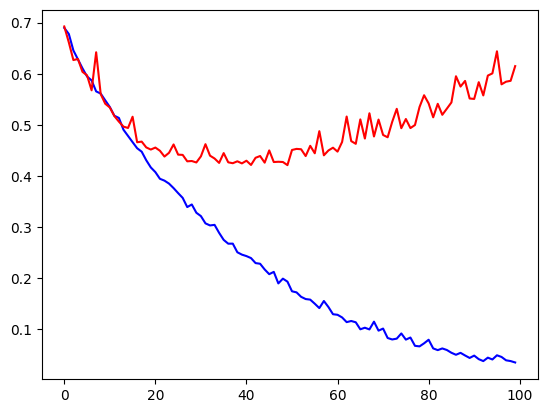

In [10]:
# history 객체의 내용을 그래프로 표현
plt.plot(model_result.history['loss'],color='b')
plt.plot(model_result.history['val_loss'],color='r')

plt.show()

In [ ]:
# imagedata generator 를 사용하기 위해서 일부분 데이터를 가지고 폴더를 만들어라

